# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [61]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [63]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,542,93,39,86,180,59,9,167,39,20,134,186,418,129,63,6,17,197,204
1,212,90,41,71,169,68,7,150,44,19,138,175,336,157,71,3,18,192,197
2,66,81,43,68,125,57,8,149,46,19,146,169,323,172,83,6,18,179,184
3,463,85,40,66,121,52,4,152,44,19,133,170,340,163,87,13,3,180,183
4,190,97,48,94,198,63,9,181,36,21,155,200,494,189,64,20,11,199,203
5,84,89,40,76,188,76,7,150,44,19,136,174,342,148,72,3,8,193,197
6,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
7,155,110,56,103,223,64,5,250,26,27,169,280,928,239,85,4,6,184,183
8,747,80,43,68,123,53,7,150,46,19,147,169,327,176,81,7,14,179,184
9,713,107,53,108,211,63,11,219,31,25,168,228,704,198,69,10,21,190,203


Methods `describe` and `info` deliver some useful information.

In [64]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.981785,93.466302,44.808743,81.721311,167.790528,61.316940,8.360656,168.455373,41.047359,20.542805,147.954463,187.888889,437.617486,174.351548,72.424408,6.253188,12.754098,188.730419,195.408015
std,243.537928,8.344611,6.121775,15.932359,33.295758,7.110552,3.877831,32.972399,7.848563,2.568139,14.516028,30.741631,174.160519,32.151703,6.823921,4.832940,9.008694,6.130590,7.416519
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,139.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,317.000000,149.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,427.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,629.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,587.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,260.000000,61.000000,28.000000,188.000000,288.000000,982.000000,268.000000,118.000000,22.000000,40.000000,206.000000,211.000000


In [65]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1 Correlation

Correlated features can lead to overfitting in Linear Regression, so let's drop correlated features

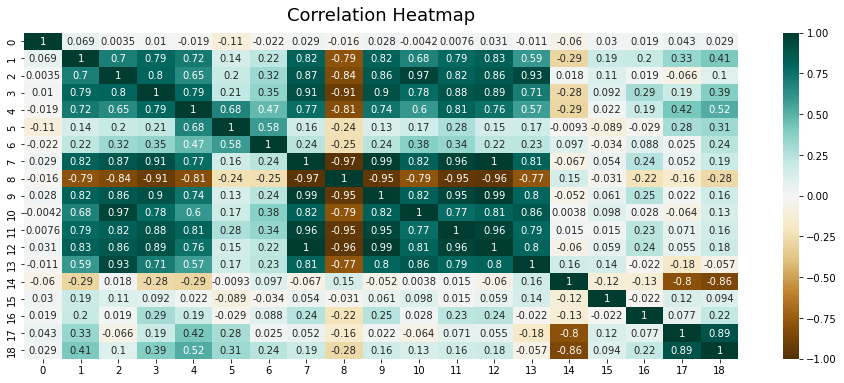

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt
def plot_corr(df):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)


plot_corr(X_train_pd)

In [67]:
def drop_correlated_features(df, threshold):
    df_result = df.copy()
    corr_matrix = df_result.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_result.drop(to_drop, axis=1, inplace=True)
    return df_result

/var/folders/r_/bq4swdms3vj5wr80yf1vm4nh0000gn/T/ipykernel_12132/1504151990.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


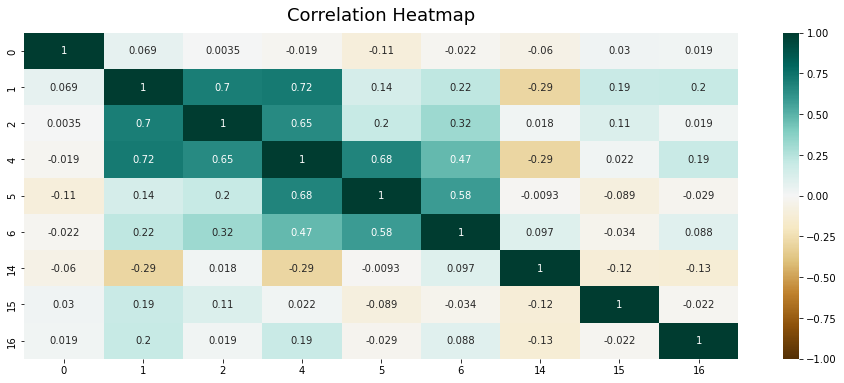

In [68]:
plot_corr(drop_correlated_features(X_train_pd, 0.8))

In [69]:
X_train_pd_non_correlated = drop_correlated_features(X_train_pd, 0.8)

/var/folders/r_/bq4swdms3vj5wr80yf1vm4nh0000gn/T/ipykernel_12132/1504151990.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


##### 2.0.2 Outliers

Since we are using MSE as a loss function, it's crucial to delete outliers, because MSE is sensitive to outliers

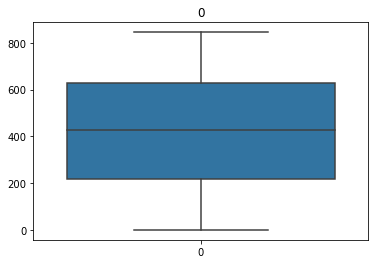

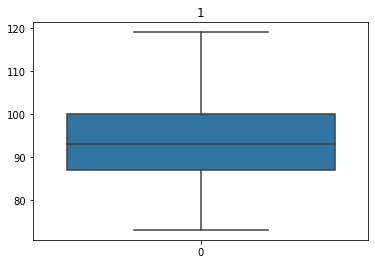

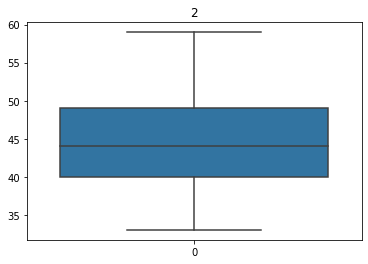

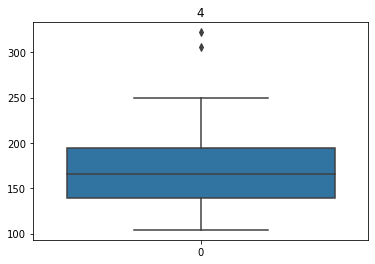

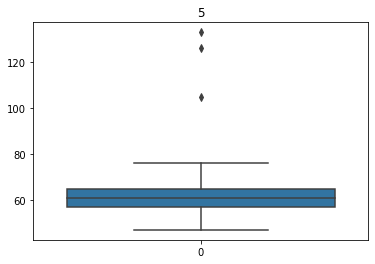

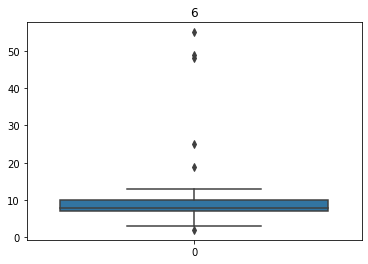

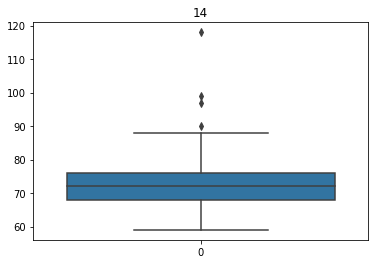

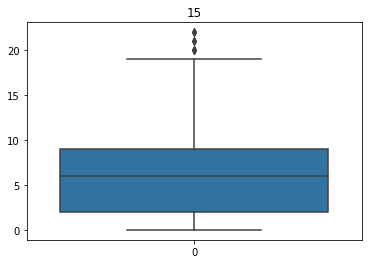

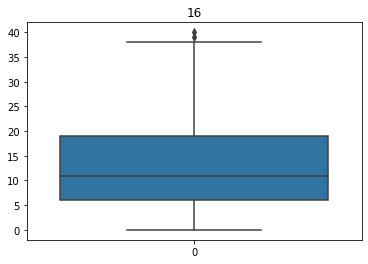

In [70]:
for column in X_train_pd_non_correlated.columns:
    sns.boxplot(data=X_train_pd_non_correlated[column]).set(title=column)
    plt.show()

let's use 1.5IQR to delete outliers

In [71]:
def delete_outliers(df):
    df_result = df.copy()
    for column in df.columns:
        Q1 = np.percentile(df_result[column] , 25)
        Q3 = np.percentile(df_result[column] , 75)

        IQR = Q3 - Q1
        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR

        # Find outliers
        df_result = df_result[(df_result[column] <= ul) & (df_result[column] >= ll)]
    return df_result

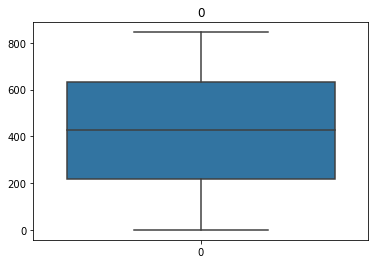

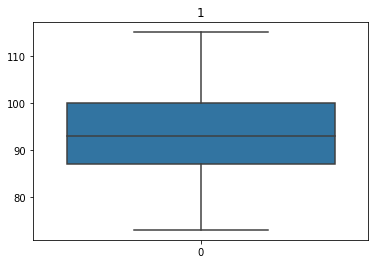

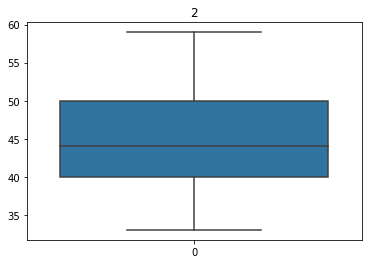

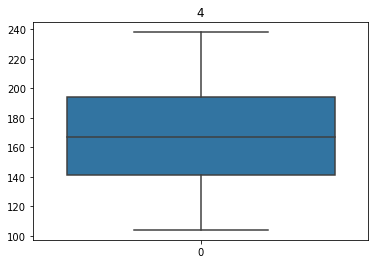

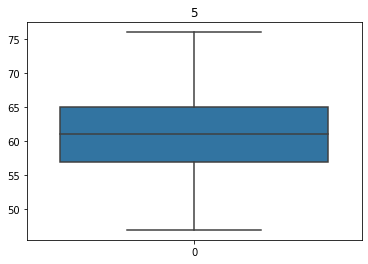

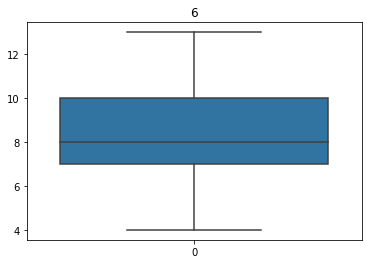

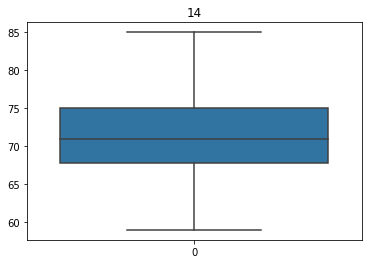

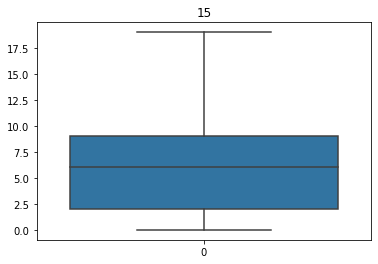

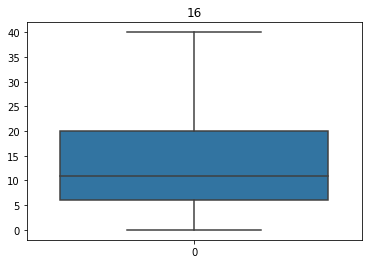

In [72]:
for column in X_train_pd_non_correlated.columns:
    sns.boxplot(data=delete_outliers(X_train_pd_non_correlated)[column]).set(title=column)
    plt.show()

In [73]:
delete_outliers(X_train_pd_non_correlated)

,0,1,2,4,5,6,14,15,16
0,542,93,39,180,59,9,63,6,17
1,212,90,41,169,68,7,71,3,18
2,66,81,43,125,57,8,83,6,18
5,84,89,40,188,76,7,72,3,8
6,242,85,42,132,58,7,83,8,4
...,...,...,...,...,...,...,...,...,...
543,742,90,41,145,55,7,67,0,1
544,98,95,46,219,68,9,69,5,38
545,322,87,43,127,56,8,85,6,3
546,382,81,46,141,61,7,80,1,14


In [74]:
X_train_pd_no_outliers = X_train_pd.iloc[delete_outliers(X_train_pd_non_correlated).index]
y_train_no_outliers = y_train[X_train_pd_no_outliers.index]

In [75]:
len(X_train_pd_no_outliers), len(y_train_no_outliers)

(520, 520)

##### 2.0.3 Pipeline

Also, from boxplots we can notice that our data have different ranges. Since we are going to use gradient descent we should normalize our data in order to avoid gradient explosion.

In [76]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class DeleteCorrelatedColumns(BaseEstimator, TransformerMixin):
    def __init__(self, threshold = 0.8):
        self.columns = None
        self.threshold = threshold

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        self.columns = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X, y=None):
        X_return = X.copy()
        return X_return.drop(columns=self.columns)


pipeline = Pipeline(steps=[
    ('remove_correlated', DeleteCorrelatedColumns()),
    ('normalize', StandardScaler()),
])

In [77]:
pipeline.fit_transform(X_train_pd_no_outliers).shape

(520, 9)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [78]:
from sklearn.linear_model import LogisticRegression

Despite the fact that sklearn.linear_model.LogisticRegression doesn't use Gradient Descent maybe it's also usefull to normalize data

In [79]:
pipeline.steps.append(['estimator', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                                                       max_iter=500, penalty='none')])

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__class_weight': ['balanced', None],
    'estimator__penalty': ['l2', 'l1', 'none'],
}

grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=3, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ['estimator',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           penalty='none',
                                                           solver='saga',
                                                           tol=0.001)]]),
             param_grid={'estimator__class_weight': ['balanced', None],
                         'estimator__penalty': ['l2', 'l1', 'none']},
             refit=False, scoring=['f1_weighted', 'accuracy'])

In [109]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.5731769626037605 accuracy: 0.5826190950767391 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'l2'}
f1_weighted: 0.5665212930780162 accuracy: 0.5768498217172723 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1'}
f1_weighted: 0.5694779471524167 accuracy: 0.578787677452218 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'none'}
f1_weighted: 0.5802024122754604 accuracy: 0.5883994418975483 
params: {'estimator__class_weight': None, 'estimator__penalty': 'l2'}
f1_weighted: 0.5866388135334087 accuracy: 0.5941908621797002 
params: {'estimator__class_weight': None, 'estimator__penalty': 'l1'}
f1_weighted: 0.5851235890790533 accuracy: 0.5922640799060971 
params: {'estimator__class_weight': None, 'estimator__penalty': 'none'}


In [111]:
best_params_lr = {'estimator__class_weight': None, 'estimator__penalty': 'l1'}
pipeline.set_params(**best_params_lr)

Pipeline(steps=[('remove_correlated', DeleteCorrelatedColumns()),
                ('normalize', StandardScaler()),
                ['estimator',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    penalty='l1', solver='saga', tol=0.001)]])

In [117]:
X_test_df = pd.DataFrame(X_test)
pipeline.fit(X_train_pd_no_outliers, y_train_no_outliers)
predicted_test = pipeline.predict_proba(X_test_df)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

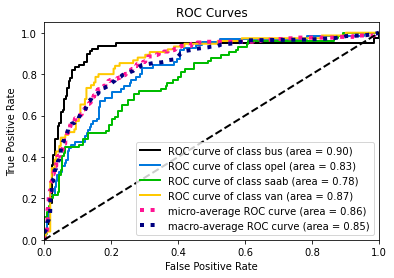

In [118]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_test)

Except that roc_auc for 'bus' much more than for 'saab', roc curve looks good

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [120]:
pipeline.steps.pop()

['estimator',
 LogisticRegression(max_iter=500, multi_class='multinomial', penalty='l1',
                    solver='saga', tol=0.001)]

In [123]:
from sklearn.decomposition import PCA
pipeline.steps.append(('PCA', PCA()))

In [124]:
pipeline.fit_transform(X_train_pd_no_outliers)

array([[-0.09081796, -0.85555945,  1.5753809 , ...,  0.10229625,
        -0.05978066, -0.37133661],
       [ 0.91800064, -1.47555619, -0.31827209, ..., -0.15979965,
         0.23559515,  0.24545151],
       [ 1.88371267,  1.13759451, -0.90536531, ..., -1.09213096,
        -0.01620381,  0.12374131],
       ...,
       [ 1.93036612,  1.66197079, -1.38288606, ..., -0.58551242,
         0.62922646, -0.04913401],
       [ 1.67070884,  0.4368155 , -0.77349677, ..., -0.75664657,
        -0.54266422,  0.27906169],
       [-2.98940826,  0.34707588, -0.87386296, ...,  0.3543287 ,
         0.18134   , -0.10546345]])

Text(0, 0.5, 'explained variance ration')

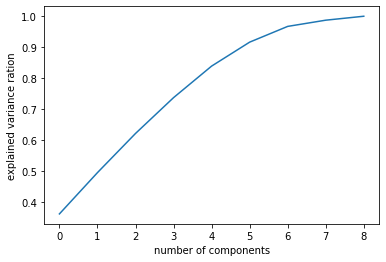

In [126]:
plt.plot(np.cumsum(pipeline['PCA'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ration')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

* Honestly, there is no sense to use PCA here, because we don't have any issues with complexity, but using PCA will lead to poor results. So, let's use all components
* Normalizing data is extremely important in PCA

In [127]:
pipeline.fit_transform(X_train_pd_no_outliers).shape

(520, 9)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [129]:
pipeline.steps.append(('estimator', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                                                       max_iter=500, penalty='none')))

In [133]:
param_grid = {
    'estimator__class_weight': ['balanced', None],
    'estimator__penalty': ['l2', 'l1', 'none'],
}

grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=3, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('estimator',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           penalty='l1',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'estimator__class_weight': ['balanced', None],
                         'estimator__penalty': ['l2', 'l1', 'none']},
             refit=False, scoring=['f1_weighted', 'accuracy'])

In [134]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.5731769626037605 accuracy: 0.5826190950767391 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'l2'}
f1_weighted: 0.5758526377522631 accuracy: 0.5864837330852878 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1'}
f1_weighted: 0.5714340869746954 accuracy: 0.5807144597258211 
params: {'estimator__class_weight': 'balanced', 'estimator__penalty': 'none'}
f1_weighted: 0.5802024122754604 accuracy: 0.5883994418975483 
params: {'estimator__class_weight': None, 'estimator__penalty': 'l2'}
f1_weighted: 0.5826289794283476 accuracy: 0.590337297632494 
params: {'estimator__class_weight': None, 'estimator__penalty': 'l1'}
f1_weighted: 0.5851235890790533 accuracy: 0.5922640799060971 
params: {'estimator__class_weight': None, 'estimator__penalty': 'none'}


In [135]:
best_params_lr = {'estimator__class_weight': None, 'estimator__penalty': 'l1'}
pipeline.set_params(**best_params_lr)

Pipeline(steps=[('remove_correlated', DeleteCorrelatedColumns()),
                ('normalize', StandardScaler()), ('PCA', PCA()),
                ('estimator',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    penalty='l1', solver='saga', tol=0.001))])

In [136]:
pipeline.fit(X_train_pd_no_outliers, y_train_no_outliers)
predicted_test = pipeline.predict_proba(X_test_df)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

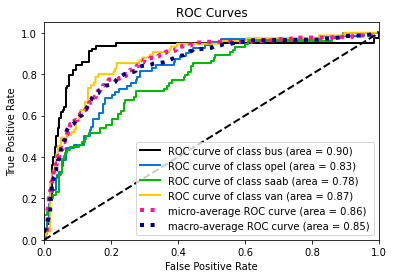

In [137]:
skplt.metrics.plot_roc(y_test, predicted_test)

Since, we used all components, result is the same, by far

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [144]:
from sklearn.tree import DecisionTreeClassifier

pipeline.steps.pop()
pipeline.steps.pop()
pipeline.steps

[('remove_correlated', DeleteCorrelatedColumns()),
 ('normalize', StandardScaler())]

In [146]:
pipeline.steps.append(('estimator', DecisionTreeClassifier()))

In [147]:
param_grid = {
    'estimator__max_depth': [i for i in range(2, 11)],
}

grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=3, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ('estimator',
                                        DecisionTreeClassifier())]),
             param_grid={'estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

In [148]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.43730368128092084 accuracy: 0.5153921112661396 
params: {'estimator__max_depth': 2}
f1_weighted: 0.5282569565343082 accuracy: 0.5692202068522578 
params: {'estimator__max_depth': 3}
f1_weighted: 0.5780784020906408 accuracy: 0.5942019356410427 
params: {'estimator__max_depth': 4}
f1_weighted: 0.6018238985350899 accuracy: 0.611554049564813 
params: {'estimator__max_depth': 5}
f1_weighted: 0.6037611701990282 accuracy: 0.6096051203685248 
params: {'estimator__max_depth': 6}
f1_weighted: 0.6336864503650348 accuracy: 0.634575775695967 
params: {'estimator__max_depth': 7}
f1_weighted: 0.6347678997500082 accuracy: 0.6345647022346245 
params: {'estimator__max_depth': 8}
f1_weighted: 0.606287698076693 accuracy: 0.6076561911722366 
params: {'estimator__max_depth': 9}
f1_weighted: 0.5982254547518661 accuracy: 0.5980444267269063 
params: {'estimator__max_depth': 10}


In [157]:
best_params_dt = {'estimator__max_depth': 8}
pipeline.set_params(**best_params_dt)

Pipeline(steps=[('remove_correlated', DeleteCorrelatedColumns()),
                ('normalize', StandardScaler()),
                ('estimator', DecisionTreeClassifier(max_depth=8))])

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

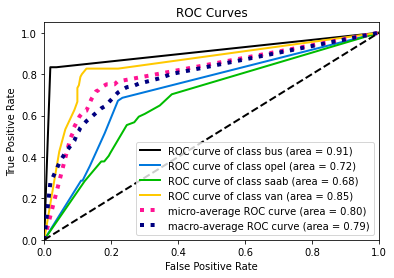

In [158]:
pipeline.fit(X_train_pd_no_outliers, y_train_no_outliers)
predicted_test = pipeline.predict_proba(X_test_df)
skplt.metrics.plot_roc(y_test, predicted_test)

Despite the fact that metrics on validation is better, roc curves are worse. We need to increase the number of cv folds

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [194]:
from sklearn.ensemble import BaggingClassifier

pipeline.steps.pop()
pipeline.steps.append(('estimator', BaggingClassifier()))

In [195]:
param_grid = {
    'estimator__n_estimators': [i for i in range(2, 101, 5)],
}

grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ('estimator', BaggingClassifier())]),
             param_grid={'estimator__n_estimators': [2, 7, 12, 17, 22, 27, 32,
                                                     37, 42, 47, 52, 57, 62, 67,
                                                     72, 77, 82, 87, 92, 97]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

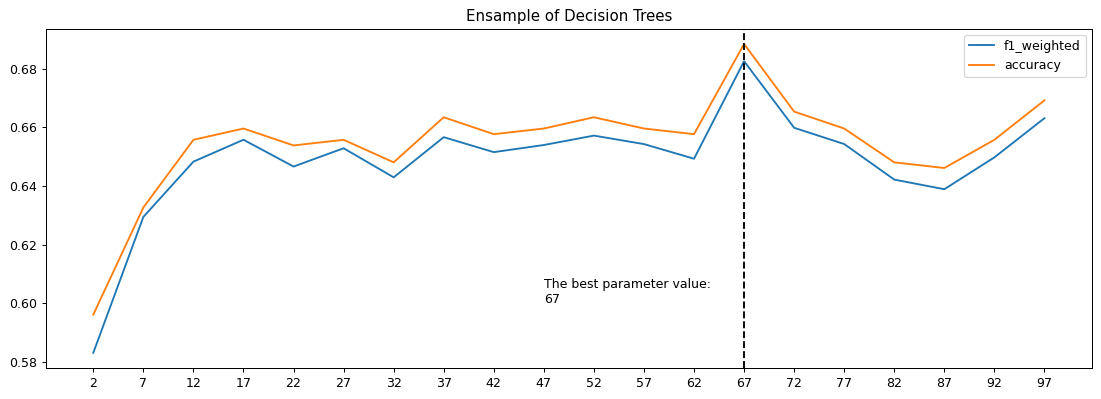

In [196]:
best_param_bagging = grid_cv.param_grid['estimator__n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(15, 5), dpi=90)
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")
plt.xticks(grid_cv.param_grid['estimator__n_estimators'])
plt.axvline(best_param_bagging, linestyle='--', color='black')
plt.text(best_param,0.6,f'The best parameter value:\n{best_param_bagging}')
plt.title('Ensample of Decision Trees')
plt.legend()

In [197]:
from sklearn.ensemble import BaggingClassifier

pipeline.steps.pop()
pipeline.steps.append(('estimator', BaggingClassifier(
    base_estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, penalty='none'))))

In [198]:
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/dmitriimaksimov/opt/anaconda3/lib/pyt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ('estimator',
                                        BaggingClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                                                            multi_class='multinomial',
                                                                                            penalty='none',
                                                                                            solver='saga',
                                                                                            tol=0.001)))]),
             param_grid={'estimator__n_estimators': [2, 7, 12, 17, 22, 27, 32,
                                                     37, 42, 47, 52, 57, 62, 67,
                   

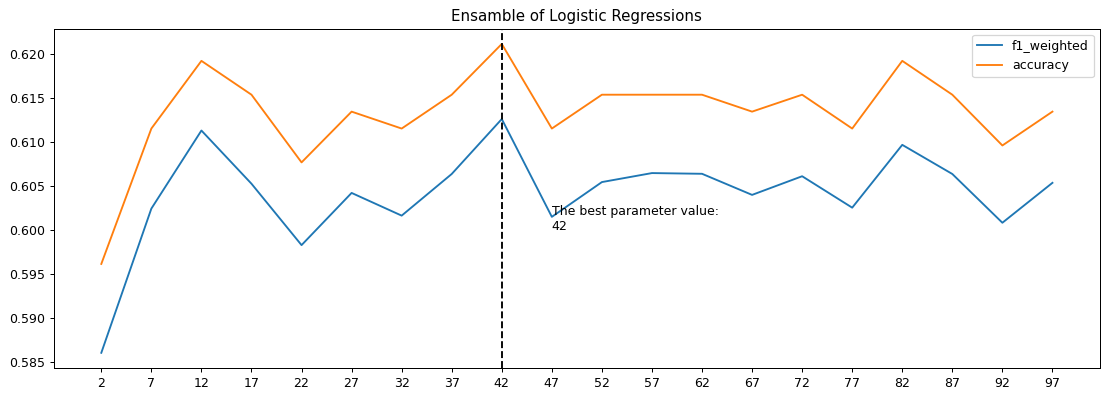

In [199]:
best_param_bagging_lr = grid_cv.param_grid['estimator__n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(15, 5), dpi=90)
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")
plt.xticks(grid_cv.param_grid['estimator__n_estimators'])
plt.axvline(best_param_bagging_lr, linestyle='--', color='black')
plt.text(best_param,0.6,f'The best parameter value:\n{best_param_bagging_lr}')
plt.title('Ensamble of Logistic Regressions')
plt.legend()

* The best value is 67 for DT and 42 for LR. Honestly, from my point of view the optimal value should have been 97. This is because bagging ensemble is not overfitted, if the base estimator is simple. So, more estimators better score, but starting at some point increase is not significant. In our case randomness can cause this unpredictable behaviour.

* As it was already mentioned base estimator should be simple, so ensamble of best decision trees is not the best ensamble.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [200]:
from sklearn.ensemble import RandomForestClassifier

pipeline.steps.pop()
pipeline.steps.append(('estimator', RandomForestClassifier()))

In [201]:
grid_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                       scoring=['f1_weighted', 'accuracy'], cv=5, refit=False)
grid_cv.fit(X_train_pd_no_outliers, y_train_no_outliers)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('remove_correlated',
                                        DeleteCorrelatedColumns()),
                                       ('normalize', StandardScaler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             param_grid={'estimator__n_estimators': [2, 7, 12, 17, 22, 27, 32,
                                                     37, 42, 47, 52, 57, 62, 67,
                                                     72, 77, 82, 87, 92, 97]},
             refit=False, scoring=['f1_weighted', 'accuracy'])

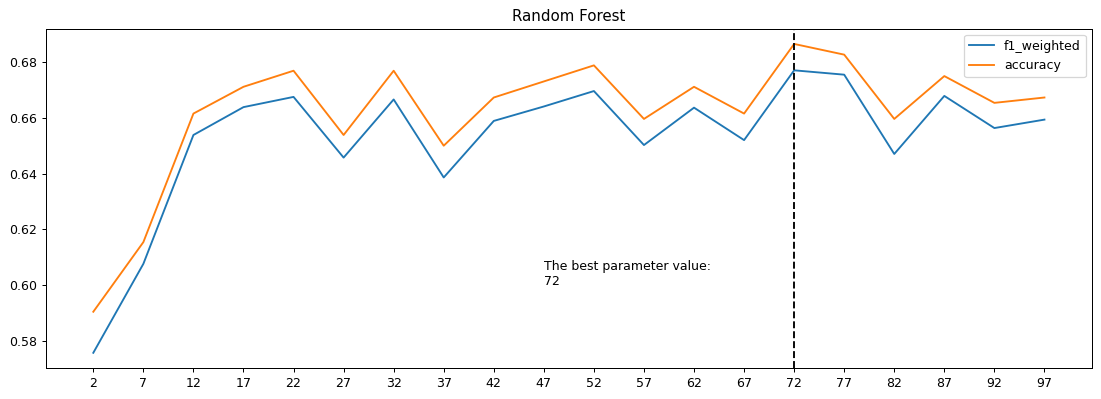

In [202]:
best_param_rf = grid_cv.param_grid['estimator__n_estimators'][
    ((grid_cv.cv_results_['mean_test_f1_weighted'] + grid_cv.cv_results_['mean_test_accuracy']) / 2).argmax()
]
plt.figure(figsize=(15, 5), dpi=90)
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_f1_weighted'],
         label = "f1_weighted")
plt.plot(grid_cv.param_grid['estimator__n_estimators'], grid_cv.cv_results_['mean_test_accuracy'],
         label = "accuracy")
plt.xticks(grid_cv.param_grid['estimator__n_estimators'])
plt.axvline(best_param_rf, linestyle='--', color='black')
plt.text(best_param,0.6,f'The best parameter value:\n{best_param_rf}')
plt.title('Random Forest')
plt.legend()

* The best value is 72, which is similar to bagging on DT. This is because, RF and Bagging on DT, differ only boosting, RF uses boosting with sqrt number of features

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [245]:
max_indx = np.linspace(len(X_train_pd_no_outliers) // 10, len(X_train_pd_no_outliers), 10, dtype=int)

In [246]:
X_train_set = [X_train_pd_no_outliers[:i] for i in max_indx]
y_train_set = [y_train_no_outliers[:i] for i in max_indx]

In [220]:
best_params_dt

{'estimator__max_depth': 8}

In [222]:
best_params_lr

{'estimator__class_weight': None, 'estimator__penalty': 'l1'}

In [225]:
classifiers = (
    LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                       max_iter=500, penalty='l1'),
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(n_estimators=best_param_rf),
)

In [226]:
from sklearn.metrics import f1_score, accuracy_score

In [252]:
metrics = {}
for model in classifiers:
    pipeline.steps.pop()
    pipeline.steps.append(('estimator', model))
    metrics[type(model).__name__] = {
        'f1_weighted': [],
        'accuracy': [],
    }
    for X, y in zip(X_train_set, y_train_set):
        pipeline.fit(X, y)
        prediction = pipeline.predict(X_test_df)
        metrics[type(model).__name__]['f1_weighted'].append(f1_score(y_test, prediction, average='weighted'))
        metrics[type(model).__name__]['accuracy'].append(accuracy_score(y_test, prediction))

In [253]:
metrics

{'LogisticRegression': {'f1_weighted': [0.4473926168027192,
   0.5370086323783191,
   0.591104885672627,
   0.6043444697771094,
   0.6109148119684426,
   0.6182746655769568,
   0.6291148450287619,
   0.6175424082800662,
   0.630786103953814,
   0.6299109306209986],
  'accuracy': [0.45454545454545453,
   0.5589225589225589,
   0.5993265993265994,
   0.6094276094276094,
   0.6161616161616161,
   0.6262626262626263,
   0.6363636363636364,
   0.6262626262626263,
   0.6363636363636364,
   0.6363636363636364]},
 'DecisionTreeClassifier': {'f1_weighted': [0.5016494876143999,
   0.5708202647144301,
   0.5472542784435652,
   0.6093072884666262,
   0.5937830687830687,
   0.6116118227799872,
   0.6613795829082453,
   0.6110064948866194,
   0.6019625700889362,
   0.626170359203096],
  'accuracy': [0.5050505050505051,
   0.5824915824915825,
   0.5488215488215489,
   0.6026936026936027,
   0.5959595959595959,
   0.6127946127946128,
   0.67003367003367,
   0.6127946127946128,
   0.6026936026936027,
 

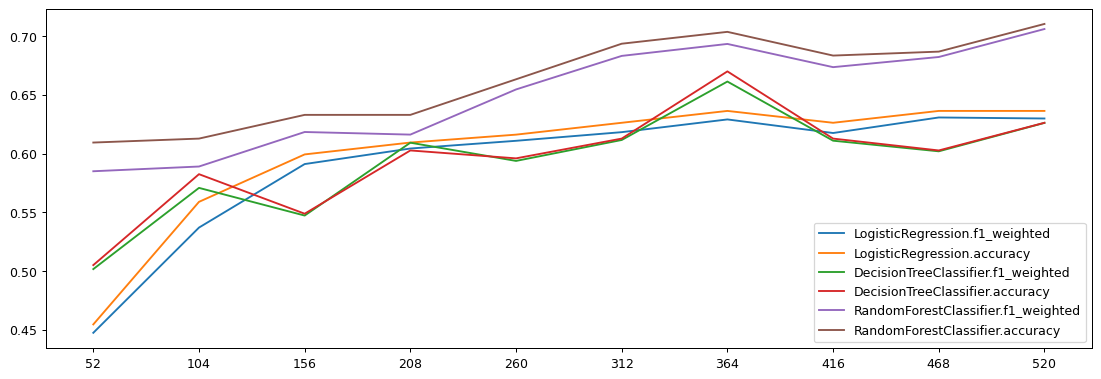

In [255]:
plt.figure(figsize=(15, 5), dpi=90)
for model_name, metric in metrics.items():
    for metric_name, values in metric.items():
        plt.plot(max_indx, values, label=f'{model_name}.{metric_name}')
plt.xticks(max_indx)
plt.legend()

* LR and RF are more stable w.r.t. input changes. Also, we can conclude that our DT model is overfitted a little bit.